# Lemke-Howson: Covariance game

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import quantecon.game_theory as gt
from quantecon import tic, tac, toc

Warmup:

In [3]:
n = 3
g = gt.random_game((n, n))
NE, res = gt.lemke_howson(g, full_output=True)
res

        NE: (array([0., 0., 1.]), array([1., 0., 0.]))
 converged: True
      init: 0
  max_iter: 1000000
  num_iter: 7

## Covariance game

In [4]:
seed = 0
n = 100
num_reps = 300

random_state = np.random.RandomState(seed)
rhos = random_state.uniform(-1, 1, num_reps)
times = np.empty(num_reps)
nums_iter = np.empty(num_reps, dtype=int)
converged = np.empty(num_reps, dtype=bool)

for i in range(num_reps):
    g = gt.covariance_game((n, n), rho=rhos[i], random_state=random_state)
    tic()
    NE, res = gt.lemke_howson(g, full_output=True)
    times[i] = toc(verbose=False)
    nums_iter[i] = res.num_iter
    converged[i] = res.converged
    msg = '.' if converged[i] else 'F'
    print(msg, end='')

............................................................................................................................................................................................................................................................................................................

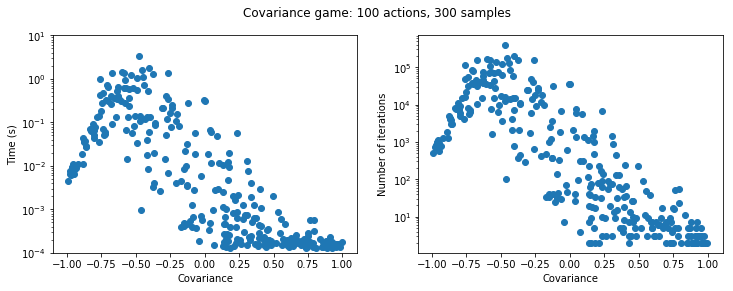

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].scatter(rhos, times)
axes[1].scatter(rhos, nums_iter)
for i in range(2):
    axes[i].set_xlabel('Covariance')
axes[0].set_yscale('log')
axes[0].set_ylim(1e-4, 10)
axes[0].set_ylabel('Time (s)')
axes[1].set_yscale('log')
axes[1].set_ylabel('Number of iterations')
fig.suptitle('Covariance game: {0} actions, {1} samples'.format(n, num_reps))
plt.show()